In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sn
import numpy as np


In [2]:
#Loading the data
tcar = pd.read_csv("C:\\Users\\bhimr\\OneDrive\\Documents\\MLR\\ToyotaCorolla - MLR.csv")
tcar.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [3]:
#Information of the dataset
tcar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [4]:
#converting the object type to numerical type
tcar['Fuel_Type'] = tcar['Fuel_Type'].map({'Diesel': 1, 'Petrol': 0})

In [5]:
tcar


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1.0,90,0,2000,3,4,5,1165
1,13750,23,72937,1.0,90,0,2000,3,4,5,1165
2,13950,24,41711,1.0,90,0,2000,3,4,5,1165
3,14950,26,48000,1.0,90,0,2000,3,4,5,1165
4,13750,30,38500,1.0,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,0.0,86,0,1300,3,4,5,1025
1432,10845,72,19000,0.0,86,0,1300,3,4,5,1015
1433,8500,71,17016,0.0,86,0,1300,3,4,5,1015
1434,7250,70,16916,0.0,86,0,1300,3,4,5,1015


In [6]:
#To check if object is transformed to numerical
tcar.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age_08_04  1436 non-null   int64  
 2   KM         1436 non-null   int64  
 3   Fuel_Type  1419 non-null   float64
 4   HP         1436 non-null   int64  
 5   Automatic  1436 non-null   int64  
 6   cc         1436 non-null   int64  
 7   Doors      1436 non-null   int64  
 8   Cylinders  1436 non-null   int64  
 9   Gears      1436 non-null   int64  
 10  Weight     1436 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 123.5 KB


In [7]:
#Data type of each variable
tcar.dtypes

Price          int64
Age_08_04      int64
KM             int64
Fuel_Type    float64
HP             int64
Automatic      int64
cc             int64
Doors          int64
Cylinders      int64
Gears          int64
Weight         int64
dtype: object

In [8]:
#Detecting Duplicate values
tcar[tcar.duplicated()].shape

(1, 11)

In [9]:
#printing the duplicate values
tcar[tcar.duplicated]

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
113,24950,8,13253,1.0,116,0,2000,5,4,5,1320


In [10]:
#Droping the duplicates value
tcar1 = tcar.drop_duplicates()


In [11]:
tcar1[tcar1.duplicated()].shape

(0, 11)

In [12]:
#Detecting null values
tcar.isnull().sum()

Price         0
Age_08_04     0
KM            0
Fuel_Type    17
HP            0
Automatic     0
cc            0
Doors         0
Cylinders     0
Gears         0
Weight        0
dtype: int64

In [13]:
# Check the count of each unique value in the 'Fuel_Type' column
print(tcar['Fuel_Type'].value_counts())


Fuel_Type
0.0    1264
1.0     155
Name: count, dtype: int64


In [14]:
# As there are null values
#mean imputation is used replacing with the mean value
mean1 = tcar1['Fuel_Type'].mean()

In [15]:
# Use .loc[] to update the column safely and avoid the warning
tcar1.loc[:, 'Fuel_Type'] = tcar1['Fuel_Type'].fillna(0)


In [16]:
#Null values are removed and checked
tcar1.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [17]:
#Descriptive statistics
#Correlation matrix to check if variables are strongly correlated with each other
tcar.describe()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1419.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,0.109232,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,0.312040,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,0.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,0.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,0.000000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,0.000000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,1.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [18]:
#Detecting and treating  outliers
import pandas as pd

# Example DataFrame (replace this with your actual dataset)
# data = pd.read_csv('your_dataset.csv') # Load your actual data here

# Function to find outliers using IQR method
def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers
#for loop for outliers of each column

for column in tcar1.columns:
    if pd.api.types.is_numeric_dtype(tcar1[column]):
        outliers = find_outliers(tcar1[column])
        if not outliers.empty:
            print(f"The outliers in {column}.")
            print(outliers)
        else:
            print("There are no outliers")
    
    

The outliers in Price.
7      18600
8      21500
10     20950
11     19950
12     19600
       ...  
182    21125
183    21500
184    17795
185    18245
523    18950
Name: Price, Length: 109, dtype: int64
The outliers in Age_08_04.
109    4
110    4
111    4
182    2
183    2
184    1
185    1
Name: Age_08_04, dtype: int64
The outliers in KM.
186     243000
187     180638
188     179860
189     178858
190     161000
191     158320
378     216000
379     198167
380     176000
381     174139
382     174000
603     205000
604     204250
605     194545
606     190900
607     183500
608     176184
609     174833
610     155720
611     155500
612     154783
613     154462
1044    232940
1045    218118
1046    217764
1047    207114
1048    203254
1049    200732
1050    197501
1051    194765
1052    191620
1053    183277
1054    180378
1055    178800
1056    176177
1057    176000
1058    172980
1059    170000
1060    164000
1061    161775
1062    160000
1063    159968
1064    159908
1065    15

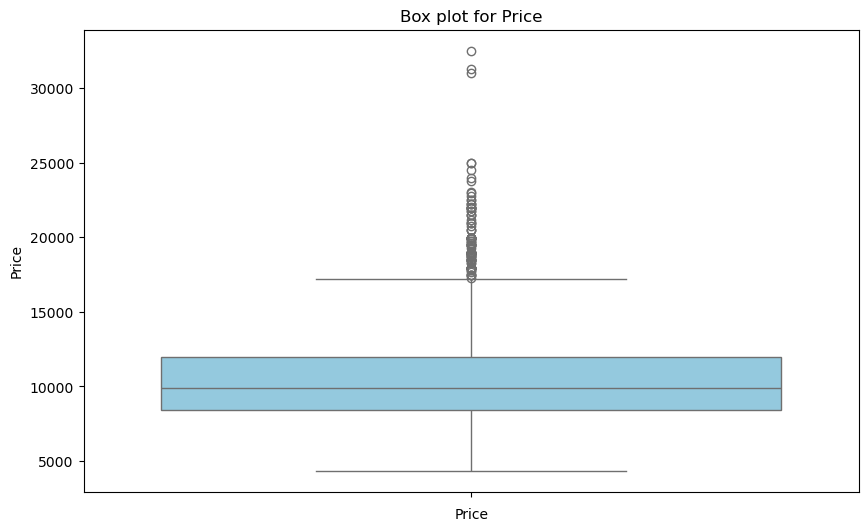

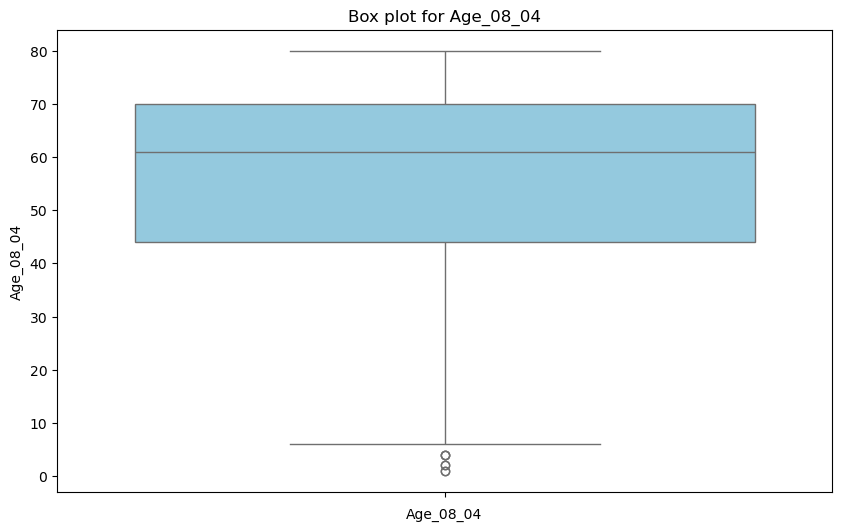

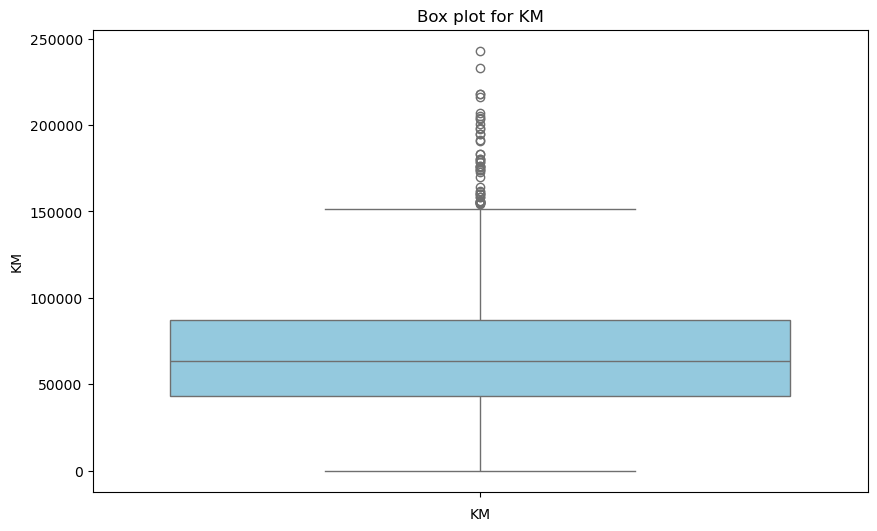

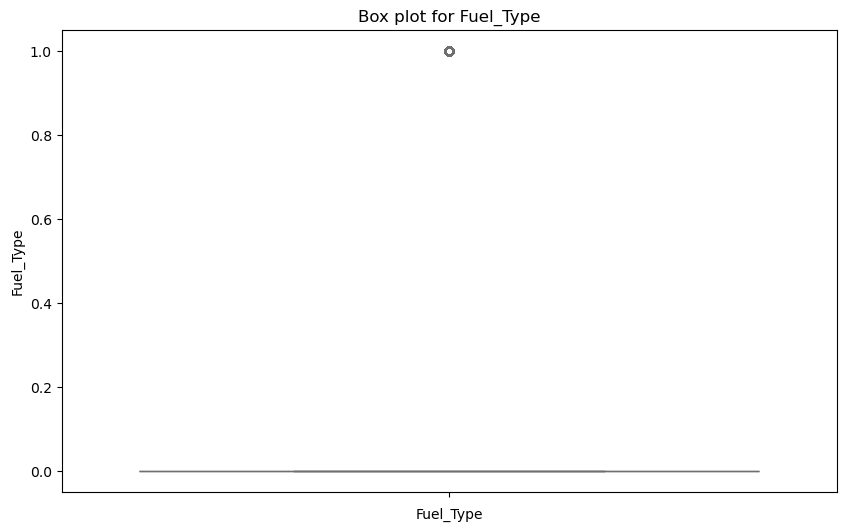

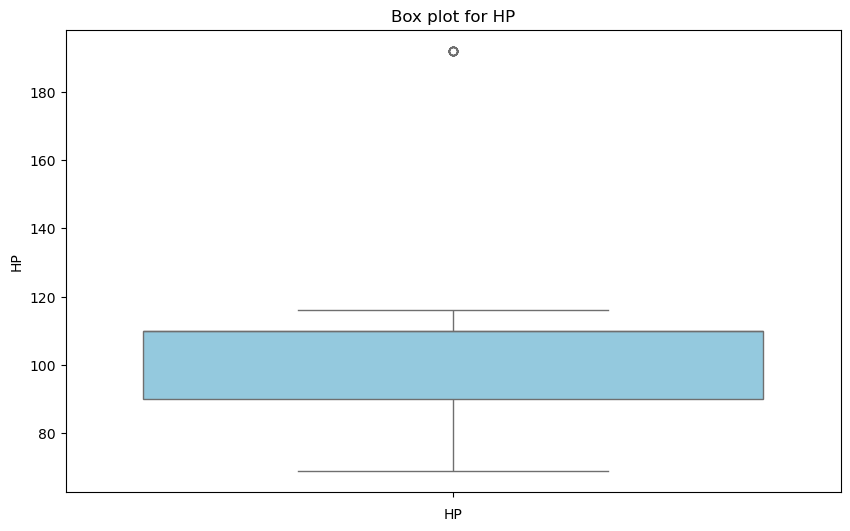

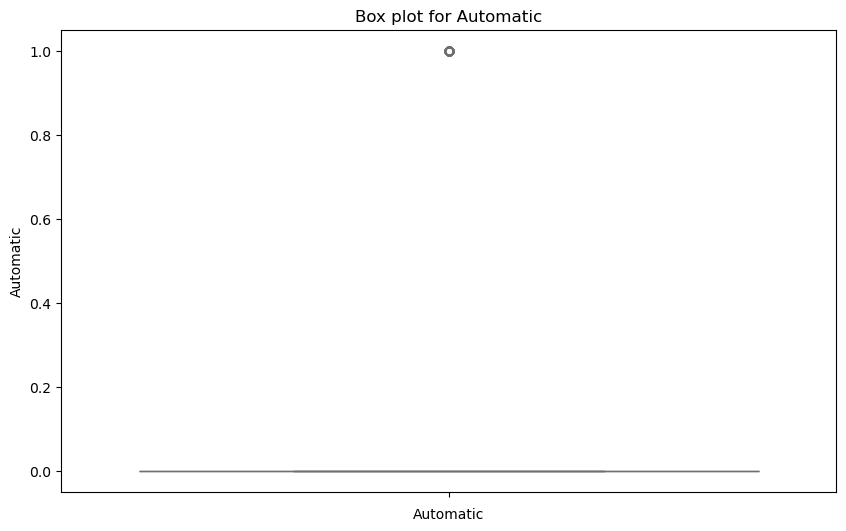

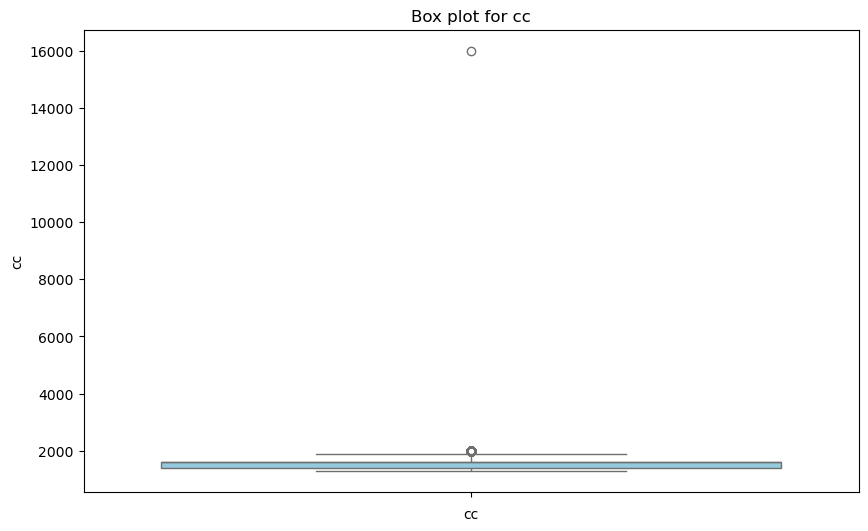

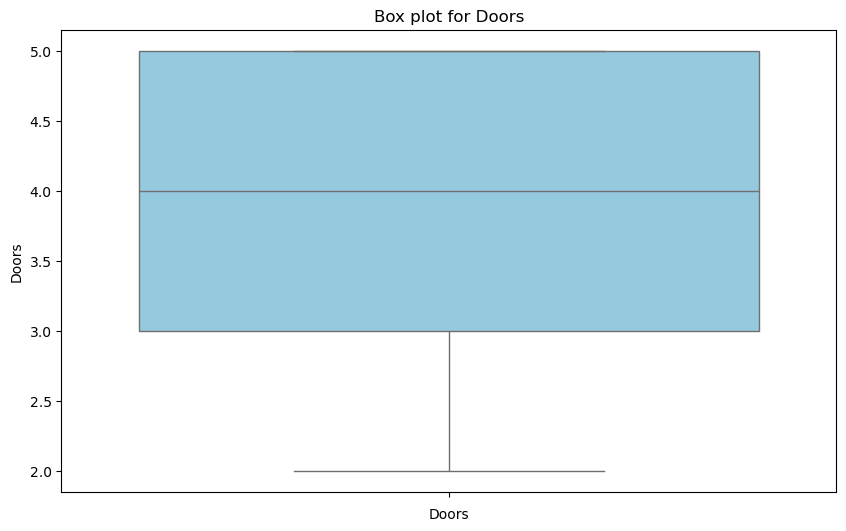

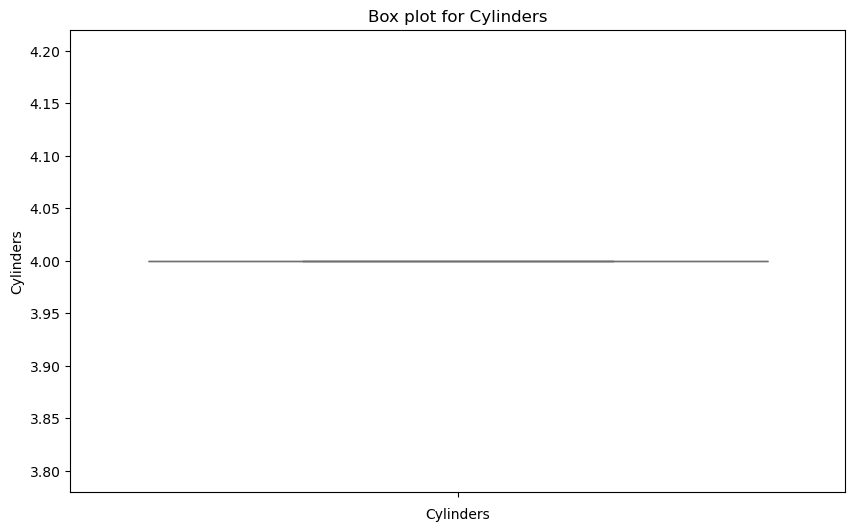

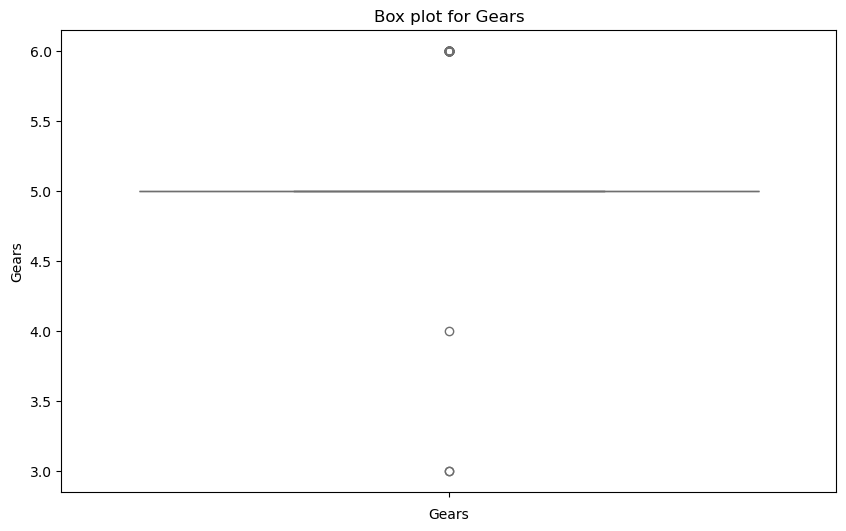

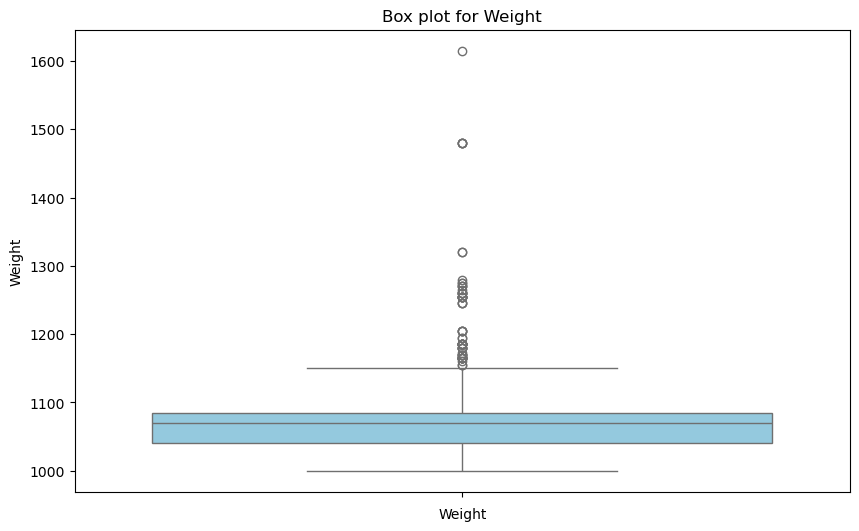

In [19]:
#Box plot to check for outliers
for column in tcar1.columns:
    plt.figure(figsize=(10, 6))
    
    # Check if the column is numeric to avoid errors with categorical data
    if pd.api.types.is_numeric_dtype(tcar1[column]):
        sns.boxplot(y=tcar1[column], color='skyblue')
        plt.title(f'Box plot for {column}')
        plt.xlabel(column)
        plt.show()
    else:
        print(f"Skipping non-numeric column: {column}")

In [20]:
  # Treating Outliers

for column in tcar1.columns:
    
    q1 = tcar1[column].quantile(0.25)  # Example lower bound
    q3 = tcar1[column].quantile(0.75)  # Example upper bound
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    tcar1.loc[:, column] = np.where(
    (tcar1[column] < lower_bound) | (tcar1[column] > upper_bound),
    tcar1[column].median(),
    tcar1[column]
)


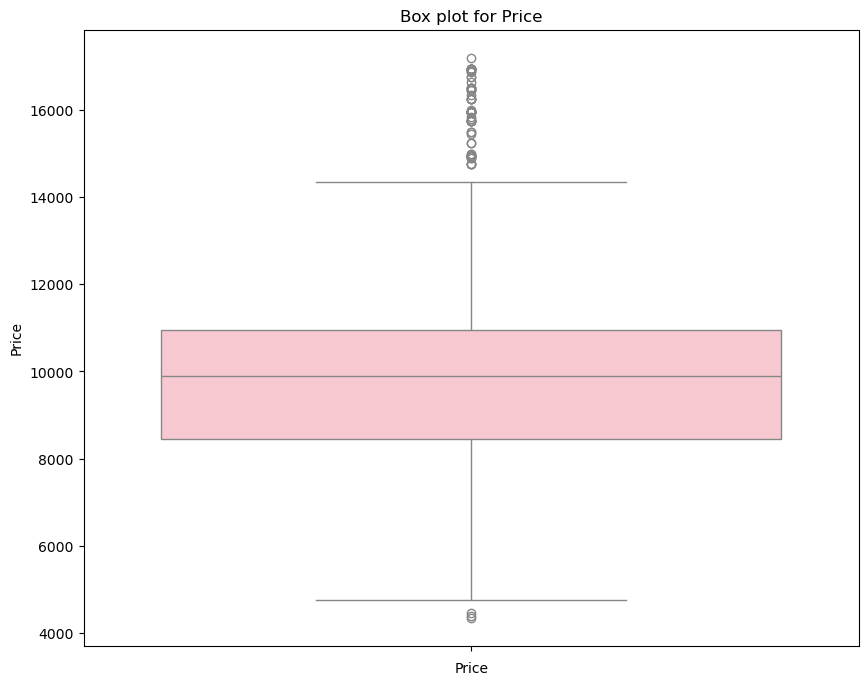

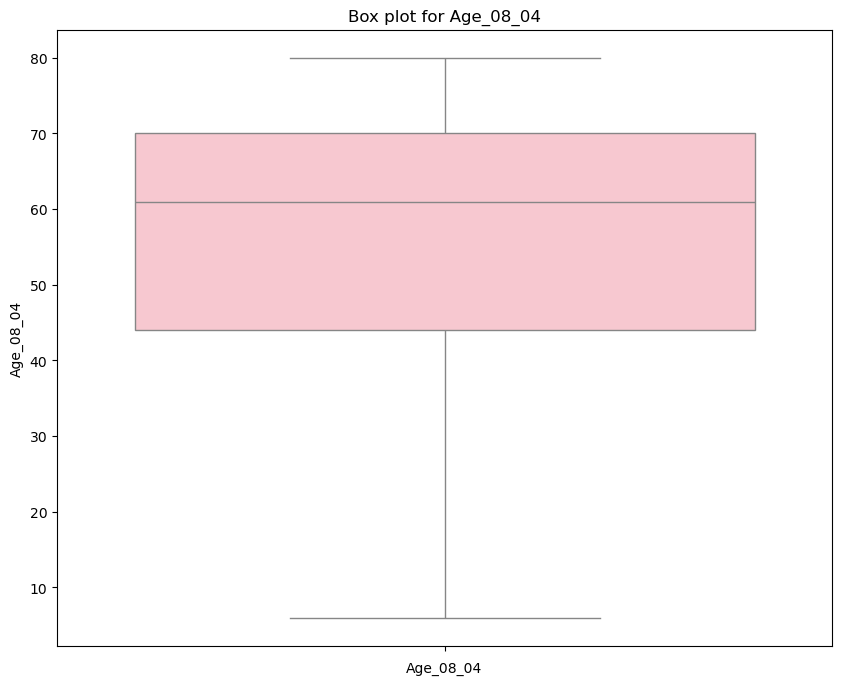

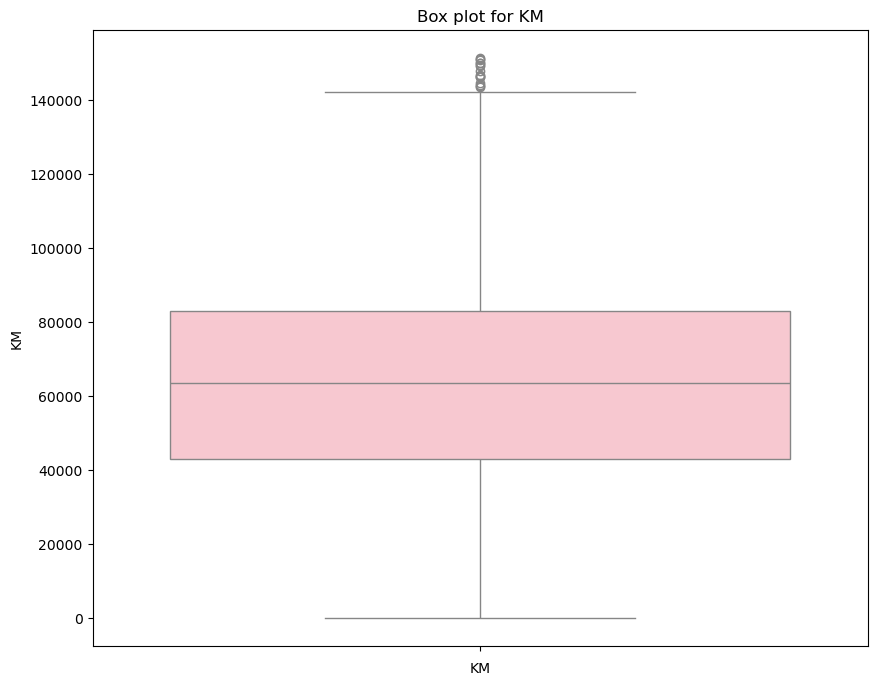

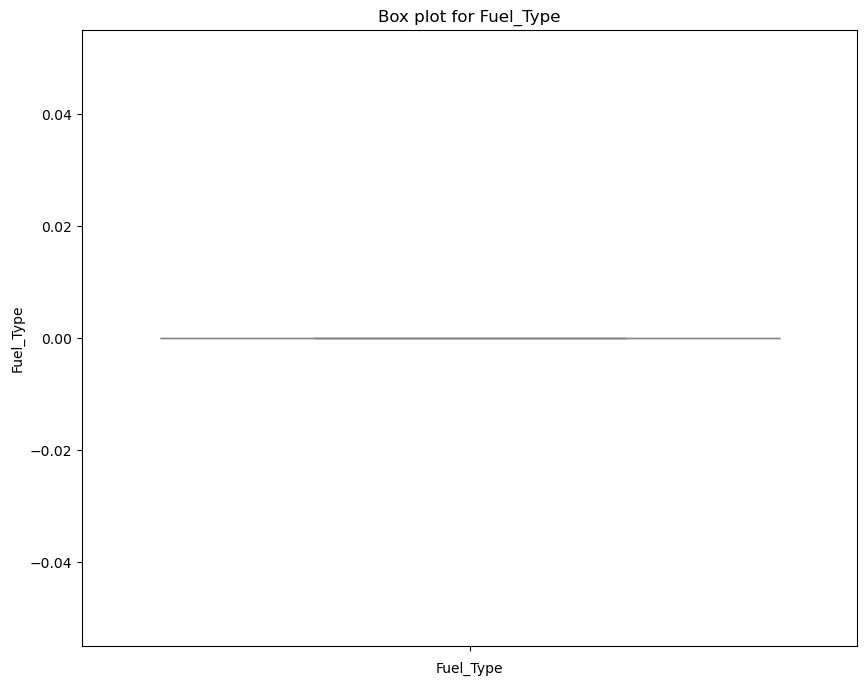

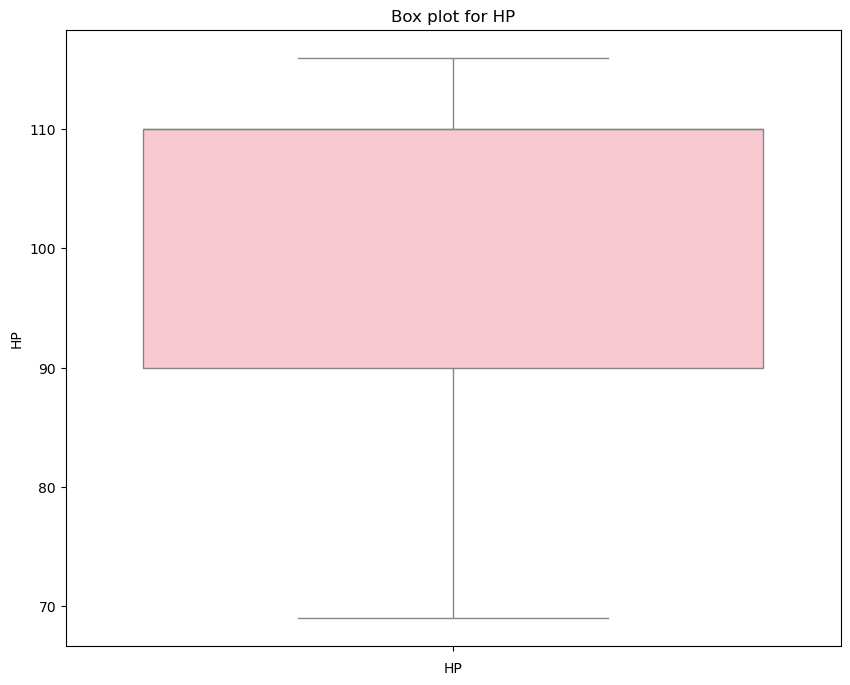

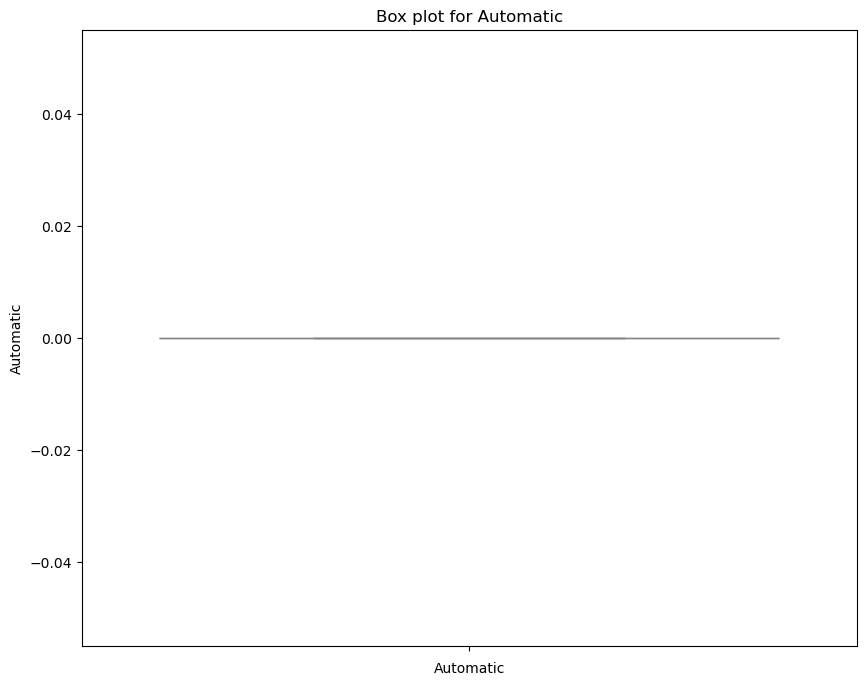

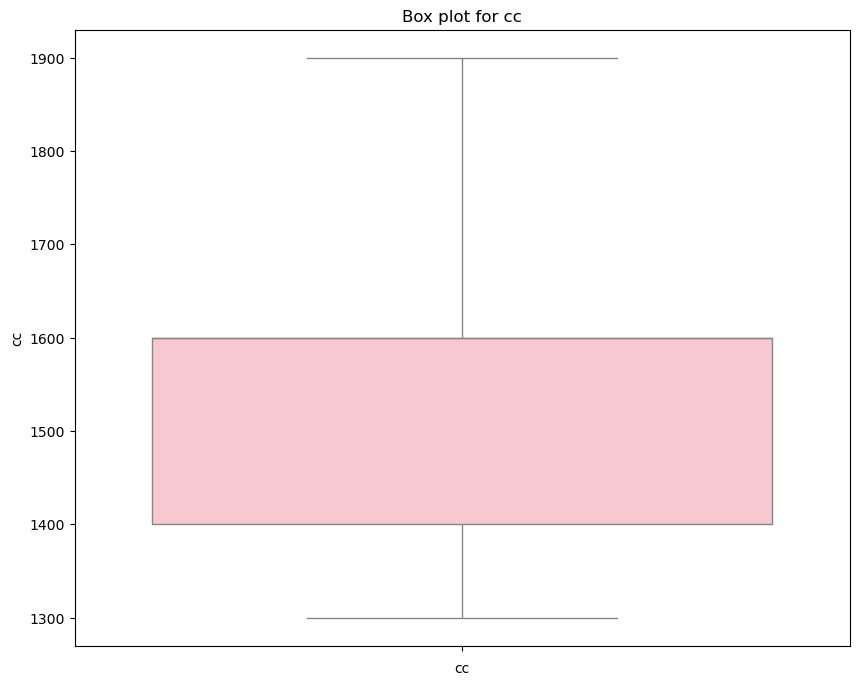

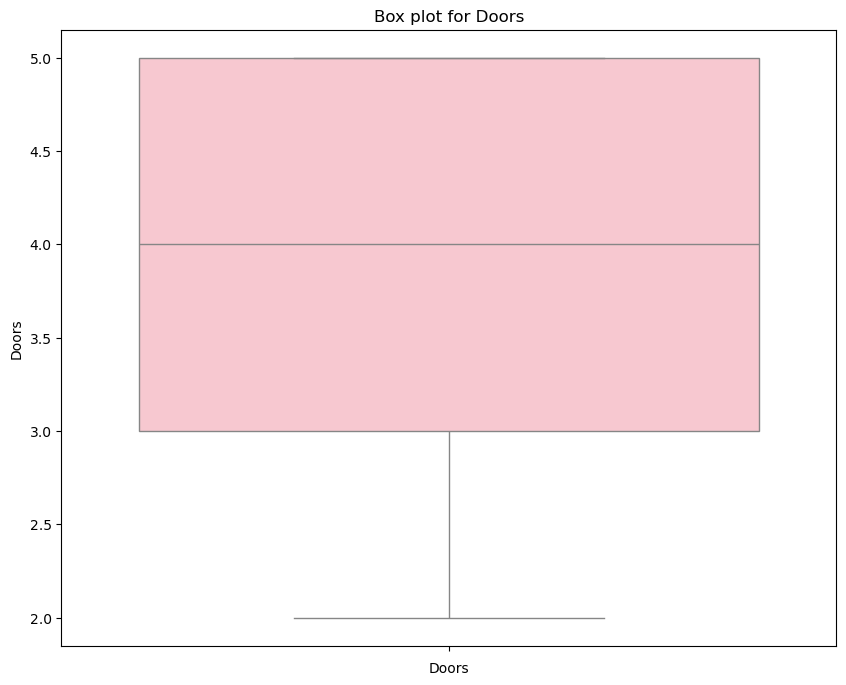

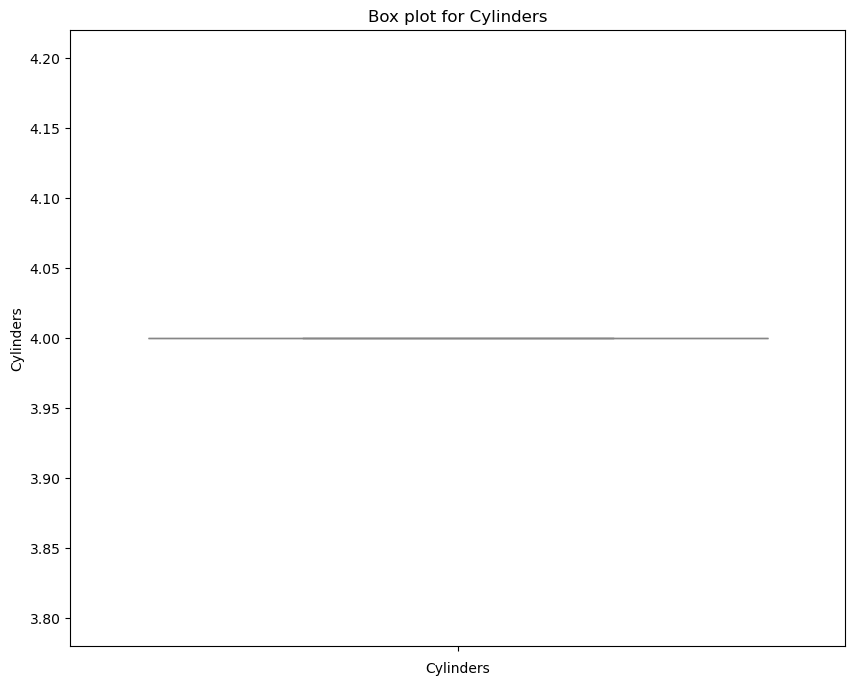

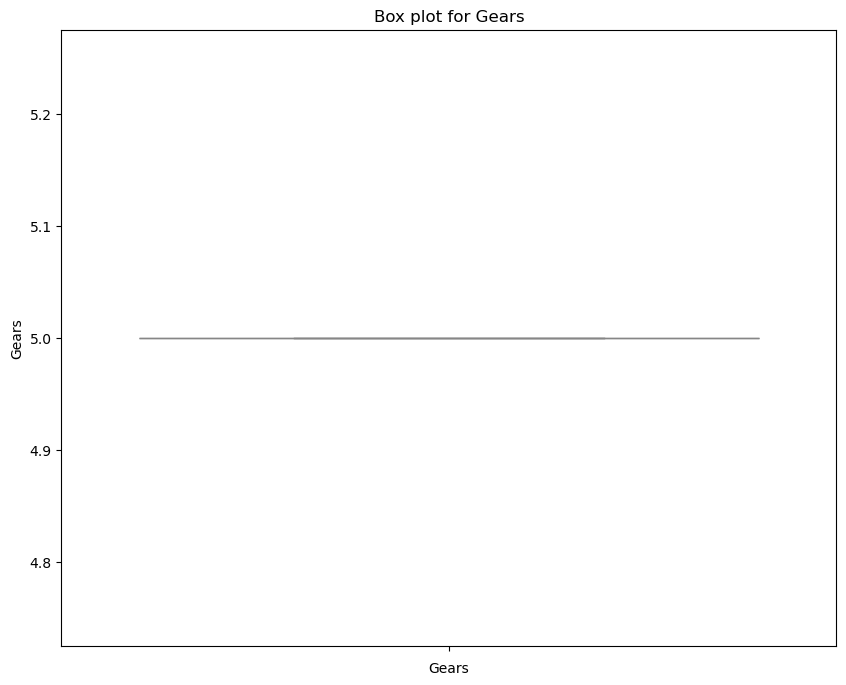

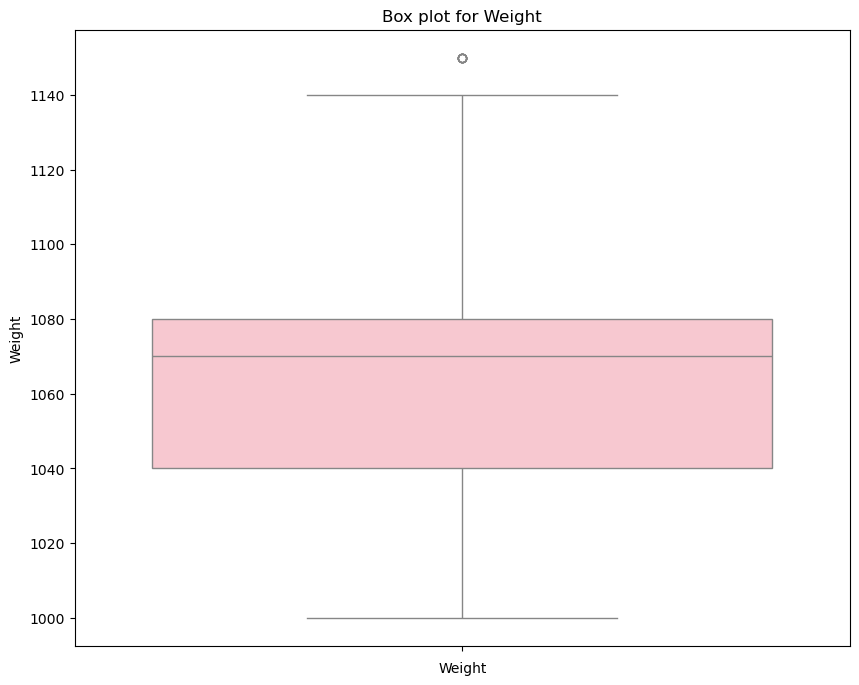

In [21]:
for column in tcar1.columns:
    plt.figure(figsize = (10,8))
    if pd.api.types.is_numeric_dtype(tcar1[column]):
        sns.boxplot(y=tcar1[column],color = 'pink')
        plt.title(f'Box plot for {column}')
        plt.xlabel(column)
        plt.show()
    else:
        print(f"Skipping non-numeric column: {column}")
        
    

In [22]:
#Outliers are replaced with nearest non outlier.

In [23]:
tcar1.describe()


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.0,1435.000000,1435.000000,1435.0,1435.0,1435.000000
mean,9941.469686,56.265505,64583.206969,0.0,100.863415,0.0,1532.822300,4.032753,4.0,5.0,1064.783972
std,2273.578438,18.185313,30781.836679,0.0,12.718693,0.0,134.366684,0.952667,0.0,0.0,33.006878
min,4350.000000,6.000000,1.000000,0.0,69.000000,0.0,1300.000000,2.000000,4.0,5.0,1000.000000
25%,8450.000000,44.000000,43000.000000,0.0,90.000000,0.0,1400.000000,3.000000,4.0,5.0,1040.000000
50%,9900.000000,61.000000,63451.000000,0.0,110.000000,0.0,1600.000000,4.000000,4.0,5.0,1070.000000
75%,10950.000000,70.000000,82774.000000,0.0,110.000000,0.0,1600.000000,5.000000,4.0,5.0,1080.000000
max,17200.000000,80.000000,151300.000000,0.0,116.000000,0.0,1900.000000,5.000000,4.0,5.0,1150.000000


In [24]:
#correlation matrix for checking multicolinearity
tcar1.corr()
#The NaN values are result of the columns having very less values . But the columns are not used in calculating the price as it has very less significance

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.677925,-0.429226,NaN,0.191437,NaN,0.084728,0.147007,NaN,NaN,0.251344
Age_08_04,-0.677925,1.000000,0.523195,NaN,-0.098033,NaN,-0.136014,-0.136474,NaN,NaN,-0.362703
KM,-0.429226,0.523195,1.000000,NaN,-0.199335,NaN,0.097020,-0.025096,NaN,NaN,-0.027060
Fuel_Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HP,0.191437,-0.098033,-0.199335,NaN,1.000000,NaN,0.390624,0.133432,NaN,NaN,-0.004024
Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,0.084728,-0.136014,0.097020,NaN,0.390624,NaN,1.000000,0.165717,NaN,NaN,0.568031
Doors,0.147007,-0.136474,-0.025096,NaN,0.133432,NaN,0.165717,1.000000,NaN,NaN,0.428554
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
sns.set_style(style = 'darkgrid')
sns.pairplot(tcar1)


In [ ]:
y = tcar1.iloc[:,0]
x = tcar1.iloc[:,1:11]


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
model = LinearRegression()
model.fit(x_train,y_train)


In [ ]:
y_pred = model.predict(x_test)

In [ ]:
r2 = r2_score(y_test, y_pred)

In [ ]:
print(r2)

In [ ]:
mean_squares = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squares)

print("RMSE:", rmse)

In [ ]:
print("coeff",model.coef_)
print("intercept",model.intercept_)

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols('Price~Age_08_04+KM+Fuel_Type+HP+Automatic+cc+Doors+Cylinders+Gears+Weight',data = tcar1).fit()


In [ ]:
print(model.params)

In [ ]:
print(model.tvalues,'\n',model.pvalues)

In [ ]:
#The  p values of each variables are less than 0.05,it can be concluded that all the variables are significant.
#The correlation matrix indicating there is no multicollinearity.
#The accuracy of the model is 0.84 which means it is a good model

In [ ]:
#Second Model
#Since there is no sign of collinearity.still for better accuracy Second model is built which takes less number of variables .
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
#5 best features
k = 8  # Number of features to select
selector = SelectKBest(score_func=f_regression, k=k)
x_train_selected = selector.fit_transform(x_train, y_train)
x_test_selected = selector.transform(x_test)

In [ ]:
#Model building
model2 = LinearRegression()
model2.fit(x_train_selected, y_train)

In [ ]:
print(model2.intercept_)
print(model2.coef_)

In [ ]:
y_pred2 = model2.predict(x_test_selected)
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

In [ ]:
print("Model 2 MSE:", mse2)
print("Model 2 R2:", r2_2)

In [ ]:
#

In [ ]:
#model 3 Applying Lasso and Ridge
from sklearn.linear_model import Lasso

# Train the Lasso model
lasso = Lasso(alpha=1.0)  # Regularization parameter
lasso.fit(x_train, y_train)

# Predictions and evaluation
y_pred3 = lasso.predict(x_test)
mse3 = mean_squared_error(y_test, y_pred3)
r2_3 = r2_score(y_test, y_pred3)

print("Model 3 (Lasso) Coefficients:", lasso.coef_)
print("Model 3 MSE:", mse3)
print("Model 3 R2:", r2_3)


In [ ]:
#Second model using Lasso and ridge tech
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)  # Regularization parameter
ridge.fit(x_train, y_train)

y_pred3_ridge = ridge.predict(x_test)
mse3_ridge = mean_squared_error(y_test, y_pred3_ridge)
r2_3_ridge = r2_score(y_test, y_pred3_ridge)

print("Model 3 (Ridge) MSE:", mse3_ridge)
print("Model 3 R2:", r2_3_ridge)


In [ ]:
# Get the mask of selected features
selected_features_mask = selector.get_support()

# Get the names of the selected features
selected_features = x_train.columns[selected_features_mask]

print("Selected Features:", selected_features)


In [ ]:
new_data = pd.DataFrame({'Age_08_04':36, 'KM':40000, 'HP':120, 'Doors':4, 'Weight':1500,'Automatic':0,'Gears':6,'Cylinders':3},index=[1])

In [ ]:
new_data


In [ ]:
model2.predict(new_data)

In [ ]:
#The model prediction 25852 which is 84% accurate

In [ ]:
# Normalization: This technique scales the data to a fixed range, typically [0, 1] or [-1, 1].
# x_norm = (x - x_min) - (x_max - x_min)
# It ensures all features have the same scale, making it useful for algorithms that rely on distance metrics .

In [ ]:
#Standardization: This technique transforms data to have a mean of 0 and a standard deviation of 1.
#It is helpful when features have different units or variances and is commonly used in linear regression, PCA, and neural networks.
#Benefit:Ensures that features contribute equally to the model.

In [ ]:
# Variance Inflation Factor (VIF): Calculate VIF for each predictor and remove variables with a high VIF.
# Regularization: Use techniques like Ridge Regression or Lasso Regression, which penalize large coefficients.
# Dropping Variables: Remove one or more highly correlated predictors based on domain knowledge or correlation analysis.